##### Colab

In [1]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install -q kaggle

In [3]:
from google.colab import userdata
import os

os.environ["kaggle_key"] = userdata.get('kaggle_key')
os.environ["kaggle_username"] = userdata.get('kaggle_username')

In [ ]:
!kaggle datasets download -d ravidussilva/real-ai-art
! unzip "real-ai-art"

##### Local & Colab

In [11]:
#Imports
import sys

# Load environment variables from .env file
from dotenv import load_dotenv
load_dotenv()

# Get the project root path from environment variables
project_root = os.getenv('PROJECT_ROOT_PATH') #OR PROJECT_ROOT_PATH_COLAB FOR COLAB

# Check if the environment variable is set correctly
if project_root is None:
    raise ValueError("PROJECT_ROOT_PATH environment variable is not set.")

# Add the project root path to the system path
sys.path.append(project_root)

from scripts.run_cnn import train_model, test_model

from models.resnet18_modified import ResNet18Modified
from models.resnet18 import ResNet18FineTuned
from scripts.evaluation import analyze_test_results
import torchvision.transforms as transforms

In [7]:
#dataset_path = "/Users/viktoriiaovsianik/Documents/Uni/04_WS2024/06_ADL/Code/ADL-WS-2024/data"
dataset_path = "/content/Real_AI_SD_LD_Dataset"

#### Train & test using transfer learning (ResNet18)

In [15]:
# Updated train_transform with data augmentation
train_transform = transforms.Compose([
      transforms.RandomHorizontalFlip(),         # Randomly flip the image horizontally
      transforms.RandomVerticalFlip(),         # Randomly flip the image vertically
      transforms.RandomRotation(30),             # Randomly rotate images by up to 30 degrees
      transforms.Resize(size=(32, 32)),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Validation and test transforms (without augmentation)
val_transform = transforms.Compose([
    transforms.Resize(size=(32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

test_transform = transforms.Compose([
    transforms.Resize(size=(32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

#freeze_layers=True & freeze_layers = ['conv1', 'bn1', 'layer1', 'layer2'] - what layers need to be frozen
#freeze_layers=False - do not freeze any layers
#freeze_layers=True - freeze all layers except for the last one
freeze_layers = ['conv1', 'bn1', 'layer1', 'layer2']
# Config for training and testing
config = {
    'model': ResNet18FineTuned(freeze_layers=False), #specific_layers_to_freeze=freeze_layers),
    'dataset_path': dataset_path,
    'model_save_dir': 'saved_models',
    'results_save_dir': 'saved_results',
    'train_transform': train_transform,
    'val_transform': val_transform,
    'test_transform': test_transform,
    'batch_size': 64,
    'learning_rate': 0.001,
    'scheduler_gamma': 0.9,
    'epochs': 10,
    'fraction': 1,
    'val_frequency': 1,
    'debug_mode': True,
    'patience': 3,
    'model_name': "ResNet18"
}

# Train the model

trainer_resnet = train_model(config)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


List of parameters that require gradients:
conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.weight
layer2.1.bn2.weight
layer2.1.bn2.bias
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1

test/accuracy,▁
test/loss,▁
test/accuracy,0.60257
test/loss,1.15506


Training with batch size: 64
Epoch 0/10:
--- Training epoch 0 ---


Train:   0%|          | 1/1407 [00:00<14:11,  1.65it/s]

Batch 0, Loss: 3.2877445220947266


Train:  36%|███▌      | 501/1407 [03:03<06:00,  2.51it/s]

Batch 500, Loss: 1.56242835521698


Train:  71%|███████   | 1001/1407 [06:07<02:39,  2.55it/s]

Batch 1000, Loss: 1.3012138605117798


Train: 100%|██████████| 1407/1407 [08:35<00:00,  2.73it/s]


Epoch 0 Training Loss: 1.7310795376671686
Training Metrics: Overall Accuracy: 0.4287
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.67
Accuracy for class AI_surrealism: 0.54
Accuracy for class human_art_nouveau: 0.73
Accuracy for class human_expressionism: 0.58
Accuracy for class human_ukiyo_e: 0.48
Accuracy for class AI_renaissance: 0.52
Accuracy for class AI_art_nouveau: 0.53
Accuracy for class human_realism: 0.58
Accuracy for class AI_realism: 0.58
Accuracy for class human_post_impressionism: 0.85
Accuracy for class human_romanticism: 0.26
Accuracy for class AI_expressionism: 0.38
Accuracy for class AI_baroque: 0.11
Accuracy for class AI_impressionism: 0.19
Accuracy for class human_surrealism: 0.18
Accuracy for class human_renaissance: 0.13
Accuracy for class AI_post_impressionism: 0.29
Accuracy for class AI_ukiyo-e: 0.18
Accuracy for class human_impressionism: 0.16
Accuracy for class AI_romanticism: 0.65
--- Validating epoch 0 ---


Evaluate:   1%|          | 1/157 [00:00<00:41,  3.76it/s]

Batch 0, Validation Loss: 1.2660908699035645


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]


Epoch 0 Validation Loss: 1.4203638957977296
Validation Metrics: Overall Accuracy: 0.5125
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.80
Accuracy for class AI_ukiyo-e: 0.58
Accuracy for class AI_romanticism: 0.81
Accuracy for class AI_art_nouveau: 0.43
Accuracy for class human_surrealism: 0.74
Accuracy for class AI_renaissance: 0.68
Accuracy for class AI_realism: 0.77
Accuracy for class human_ukiyo_e: 0.74
Accuracy for class human_art_nouveau: 0.74
Accuracy for class AI_post_impressionism: 0.96
Accuracy for class human_baroque: 0.17
Accuracy for class human_impressionism: 0.30
Accuracy for class AI_impressionism: 0.14
Accuracy for class human_renaissance: 0.26
Accuracy for class human_expressionism: 0.24
Accuracy for class human_realism: 0.24
Accuracy for class AI_baroque: 0.33
Accuracy for class human_post_impressionism: 0.24
Accuracy for class AI_surrealism: 0.30
Accuracy for class AI_expressionism: 0.78
#### Best accuracy 0.5125 at epoch 0
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<07:46,  3.02it/s]

Batch 0, Loss: 1.5513417720794678


Train:  36%|███▌      | 501/1407 [03:03<05:18,  2.84it/s]

Batch 500, Loss: 1.228940486907959


Train:  71%|███████   | 1001/1407 [06:07<02:27,  2.75it/s]

Batch 1000, Loss: 1.7910693883895874


Train: 100%|██████████| 1407/1407 [08:36<00:00,  2.73it/s]


Epoch 1 Training Loss: 1.4256313709682888
Training Metrics: Overall Accuracy: 0.5118
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.78
Accuracy for class AI_surrealism: 0.66
Accuracy for class human_art_nouveau: 0.79
Accuracy for class human_expressionism: 0.65
Accuracy for class human_ukiyo_e: 0.59
Accuracy for class AI_renaissance: 0.63
Accuracy for class AI_art_nouveau: 0.65
Accuracy for class human_realism: 0.67
Accuracy for class AI_realism: 0.69
Accuracy for class human_post_impressionism: 0.92
Accuracy for class human_romanticism: 0.32
Accuracy for class AI_expressionism: 0.42
Accuracy for class AI_baroque: 0.15
Accuracy for class AI_impressionism: 0.24
Accuracy for class human_surrealism: 0.27
Accuracy for class human_renaissance: 0.18
Accuracy for class AI_post_impressionism: 0.40
Accuracy for class AI_ukiyo-e: 0.22
Accuracy for class human_impressionism: 0.25
Accuracy for class AI_romanticism: 0.78
--- Validating epoch 1 ---


Evaluate:   1%|          | 1/157 [00:00<00:41,  3.77it/s]

Batch 0, Validation Loss: 1.1558822393417358


Evaluate: 100%|██████████| 157/157 [00:46<00:00,  3.38it/s]


Epoch 1 Validation Loss: 1.3060187871932984
Validation Metrics: Overall Accuracy: 0.5507
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.86
Accuracy for class AI_ukiyo-e: 0.65
Accuracy for class AI_romanticism: 0.86
Accuracy for class AI_art_nouveau: 0.69
Accuracy for class human_surrealism: 0.64
Accuracy for class AI_renaissance: 0.64
Accuracy for class AI_realism: 0.75
Accuracy for class human_ukiyo_e: 0.75
Accuracy for class human_art_nouveau: 0.74
Accuracy for class AI_post_impressionism: 0.97
Accuracy for class human_baroque: 0.28
Accuracy for class human_impressionism: 0.50
Accuracy for class AI_impressionism: 0.11
Accuracy for class human_renaissance: 0.20
Accuracy for class human_expressionism: 0.34
Accuracy for class human_realism: 0.20
Accuracy for class AI_baroque: 0.44
Accuracy for class human_post_impressionism: 0.30
Accuracy for class AI_surrealism: 0.30
Accuracy for class AI_expressionism: 0.80
#### Best accuracy 0.5507 at epoch 1
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<08:54,  2.63it/s]

Batch 0, Loss: 1.2102642059326172


Train:  36%|███▌      | 501/1407 [03:03<05:03,  2.99it/s]

Batch 500, Loss: 1.5394399166107178


Train:  71%|███████   | 1001/1407 [06:07<02:30,  2.70it/s]

Batch 1000, Loss: 1.4972327947616577


Train: 100%|██████████| 1407/1407 [08:35<00:00,  2.73it/s]


Epoch 2 Training Loss: 1.3360198246214126
Training Metrics: Overall Accuracy: 0.5385
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.81
Accuracy for class AI_surrealism: 0.70
Accuracy for class human_art_nouveau: 0.82
Accuracy for class human_expressionism: 0.66
Accuracy for class human_ukiyo_e: 0.61
Accuracy for class AI_renaissance: 0.66
Accuracy for class AI_art_nouveau: 0.70
Accuracy for class human_realism: 0.71
Accuracy for class AI_realism: 0.73
Accuracy for class human_post_impressionism: 0.94
Accuracy for class human_romanticism: 0.34
Accuracy for class AI_expressionism: 0.45
Accuracy for class AI_baroque: 0.18
Accuracy for class AI_impressionism: 0.25
Accuracy for class human_surrealism: 0.28
Accuracy for class human_renaissance: 0.19
Accuracy for class AI_post_impressionism: 0.43
Accuracy for class AI_ukiyo-e: 0.25
Accuracy for class human_impressionism: 0.29
Accuracy for class AI_romanticism: 0.80
--- Validating epoch 2 ---


Evaluate:   1%|          | 1/157 [00:00<00:41,  3.76it/s]

Batch 0, Validation Loss: 1.142791748046875


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.46it/s]


Epoch 2 Validation Loss: 1.2526921586990356
Validation Metrics: Overall Accuracy: 0.5622
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.84
Accuracy for class AI_ukiyo-e: 0.63
Accuracy for class AI_romanticism: 0.82
Accuracy for class AI_art_nouveau: 0.64
Accuracy for class human_surrealism: 0.73
Accuracy for class AI_renaissance: 0.64
Accuracy for class AI_realism: 0.77
Accuracy for class human_ukiyo_e: 0.80
Accuracy for class human_art_nouveau: 0.79
Accuracy for class AI_post_impressionism: 0.97
Accuracy for class human_baroque: 0.34
Accuracy for class human_impressionism: 0.46
Accuracy for class AI_impressionism: 0.16
Accuracy for class human_renaissance: 0.34
Accuracy for class human_expressionism: 0.31
Accuracy for class human_realism: 0.10
Accuracy for class AI_baroque: 0.39
Accuracy for class human_post_impressionism: 0.33
Accuracy for class AI_surrealism: 0.33
Accuracy for class AI_expressionism: 0.86
#### Best accuracy 0.5622 at epoch 2
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<08:28,  2.77it/s]

Batch 0, Loss: 1.2253806591033936


Train:  36%|███▌      | 501/1407 [03:02<05:36,  2.69it/s]

Batch 500, Loss: 1.0834615230560303


Train:  71%|███████   | 1001/1407 [06:08<02:23,  2.83it/s]

Batch 1000, Loss: 1.2250425815582275


Train: 100%|██████████| 1407/1407 [08:38<00:00,  2.71it/s]


Epoch 3 Training Loss: 1.28139401512146
Training Metrics: Overall Accuracy: 0.5556
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.83
Accuracy for class AI_surrealism: 0.72
Accuracy for class human_art_nouveau: 0.82
Accuracy for class human_expressionism: 0.67
Accuracy for class human_ukiyo_e: 0.62
Accuracy for class AI_renaissance: 0.68
Accuracy for class AI_art_nouveau: 0.72
Accuracy for class human_realism: 0.73
Accuracy for class AI_realism: 0.76
Accuracy for class human_post_impressionism: 0.95
Accuracy for class human_romanticism: 0.34
Accuracy for class AI_expressionism: 0.47
Accuracy for class AI_baroque: 0.19
Accuracy for class AI_impressionism: 0.28
Accuracy for class human_surrealism: 0.29
Accuracy for class human_renaissance: 0.19
Accuracy for class AI_post_impressionism: 0.44
Accuracy for class AI_ukiyo-e: 0.25
Accuracy for class human_impressionism: 0.33
Accuracy for class AI_romanticism: 0.81
--- Validating epoch 3 ---


Evaluate:   1%|          | 1/157 [00:00<00:57,  2.71it/s]

Batch 0, Validation Loss: 1.1140364408493042


Evaluate: 100%|██████████| 157/157 [00:46<00:00,  3.38it/s]


Epoch 3 Validation Loss: 1.2382681465148926
Validation Metrics: Overall Accuracy: 0.5723
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.91
Accuracy for class AI_ukiyo-e: 0.63
Accuracy for class AI_romanticism: 0.85
Accuracy for class AI_art_nouveau: 0.77
Accuracy for class human_surrealism: 0.59
Accuracy for class AI_renaissance: 0.76
Accuracy for class AI_realism: 0.75
Accuracy for class human_ukiyo_e: 0.73
Accuracy for class human_art_nouveau: 0.75
Accuracy for class AI_post_impressionism: 0.97
Accuracy for class human_baroque: 0.30
Accuracy for class human_impressionism: 0.53
Accuracy for class AI_impressionism: 0.14
Accuracy for class human_renaissance: 0.24
Accuracy for class human_expressionism: 0.37
Accuracy for class human_realism: 0.34
Accuracy for class AI_baroque: 0.43
Accuracy for class human_post_impressionism: 0.13
Accuracy for class AI_surrealism: 0.39
Accuracy for class AI_expressionism: 0.88
#### Best accuracy 0.5723 at epoch 3
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<09:54,  2.37it/s]

Batch 0, Loss: 1.1011443138122559


Train:  36%|███▌      | 501/1407 [03:05<05:29,  2.75it/s]

Batch 500, Loss: 1.1666877269744873


Train:  71%|███████   | 1001/1407 [06:11<02:28,  2.73it/s]

Batch 1000, Loss: 1.2569257020950317


Train: 100%|██████████| 1407/1407 [08:42<00:00,  2.69it/s]


Epoch 4 Training Loss: 1.2457295483695137
Training Metrics: Overall Accuracy: 0.5674
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.83
Accuracy for class AI_surrealism: 0.74
Accuracy for class human_art_nouveau: 0.84
Accuracy for class human_expressionism: 0.70
Accuracy for class human_ukiyo_e: 0.63
Accuracy for class AI_renaissance: 0.71
Accuracy for class AI_art_nouveau: 0.74
Accuracy for class human_realism: 0.75
Accuracy for class AI_realism: 0.76
Accuracy for class human_post_impressionism: 0.95
Accuracy for class human_romanticism: 0.36
Accuracy for class AI_expressionism: 0.49
Accuracy for class AI_baroque: 0.21
Accuracy for class AI_impressionism: 0.27
Accuracy for class human_surrealism: 0.31
Accuracy for class human_renaissance: 0.20
Accuracy for class AI_post_impressionism: 0.47
Accuracy for class AI_ukiyo-e: 0.26
Accuracy for class human_impressionism: 0.33
Accuracy for class AI_romanticism: 0.82
--- Validating epoch 4 ---


Evaluate:   1%|          | 1/157 [00:00<00:43,  3.57it/s]

Batch 0, Validation Loss: 1.0292859077453613


Evaluate: 100%|██████████| 157/157 [00:46<00:00,  3.40it/s]


Epoch 4 Validation Loss: 1.1944358545303344
Validation Metrics: Overall Accuracy: 0.5812
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.88
Accuracy for class AI_ukiyo-e: 0.74
Accuracy for class AI_romanticism: 0.85
Accuracy for class AI_art_nouveau: 0.60
Accuracy for class human_surrealism: 0.75
Accuracy for class AI_renaissance: 0.73
Accuracy for class AI_realism: 0.78
Accuracy for class human_ukiyo_e: 0.75
Accuracy for class human_art_nouveau: 0.81
Accuracy for class AI_post_impressionism: 0.98
Accuracy for class human_baroque: 0.41
Accuracy for class human_impressionism: 0.36
Accuracy for class AI_impressionism: 0.19
Accuracy for class human_renaissance: 0.32
Accuracy for class human_expressionism: 0.33
Accuracy for class human_realism: 0.20
Accuracy for class AI_baroque: 0.46
Accuracy for class human_post_impressionism: 0.28
Accuracy for class AI_surrealism: 0.36
Accuracy for class AI_expressionism: 0.85
#### Best accuracy 0.5812 at epoch 4
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<09:19,  2.51it/s]

Batch 0, Loss: 1.1646302938461304


Train:  36%|███▌      | 501/1407 [03:03<05:23,  2.80it/s]

Batch 500, Loss: 1.152714729309082


Train:  71%|███████   | 1001/1407 [06:08<02:35,  2.61it/s]

Batch 1000, Loss: 1.0482779741287231


Train: 100%|██████████| 1407/1407 [08:38<00:00,  2.71it/s]


Epoch 5 Training Loss: 1.209819418165419
Training Metrics: Overall Accuracy: 0.5784
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.84
Accuracy for class AI_surrealism: 0.75
Accuracy for class human_art_nouveau: 0.85
Accuracy for class human_expressionism: 0.71
Accuracy for class human_ukiyo_e: 0.65
Accuracy for class AI_renaissance: 0.72
Accuracy for class AI_art_nouveau: 0.75
Accuracy for class human_realism: 0.76
Accuracy for class AI_realism: 0.77
Accuracy for class human_post_impressionism: 0.96
Accuracy for class human_romanticism: 0.36
Accuracy for class AI_expressionism: 0.48
Accuracy for class AI_baroque: 0.21
Accuracy for class AI_impressionism: 0.29
Accuracy for class human_surrealism: 0.32
Accuracy for class human_renaissance: 0.22
Accuracy for class AI_post_impressionism: 0.47
Accuracy for class AI_ukiyo-e: 0.27
Accuracy for class human_impressionism: 0.35
Accuracy for class AI_romanticism: 0.84
--- Validating epoch 5 ---


Evaluate:   1%|          | 1/157 [00:00<00:41,  3.78it/s]

Batch 0, Validation Loss: 1.0742173194885254


Evaluate: 100%|██████████| 157/157 [00:46<00:00,  3.38it/s]


Epoch 5 Validation Loss: 1.1989974063873292
Validation Metrics: Overall Accuracy: 0.5784
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.84
Accuracy for class AI_ukiyo-e: 0.72
Accuracy for class AI_romanticism: 0.86
Accuracy for class AI_art_nouveau: 0.69
Accuracy for class human_surrealism: 0.74
Accuracy for class AI_renaissance: 0.72
Accuracy for class AI_realism: 0.80
Accuracy for class human_ukiyo_e: 0.75
Accuracy for class human_art_nouveau: 0.82
Accuracy for class AI_post_impressionism: 0.96
Accuracy for class human_baroque: 0.27
Accuracy for class human_impressionism: 0.45
Accuracy for class AI_impressionism: 0.20
Accuracy for class human_renaissance: 0.10
Accuracy for class human_expressionism: 0.46
Accuracy for class human_realism: 0.31
Accuracy for class AI_baroque: 0.43
Accuracy for class human_post_impressionism: 0.35
Accuracy for class AI_surrealism: 0.29
Accuracy for class AI_expressionism: 0.82
Early stopping counter: 1/3
Epoch 6/10:
--- Training epoch 6 ---

Train:   0%|          | 1/1407 [00:00<09:25,  2.48it/s]

Batch 0, Loss: 1.0106950998306274


Train:  36%|███▌      | 501/1407 [03:05<05:13,  2.89it/s]

Batch 500, Loss: 1.0592477321624756


Train:  71%|███████   | 1001/1407 [06:11<02:25,  2.79it/s]

Batch 1000, Loss: 1.4886720180511475


Train: 100%|██████████| 1407/1407 [08:40<00:00,  2.70it/s]


Epoch 6 Training Loss: 1.1836768035676744
Training Metrics: Overall Accuracy: 0.5863
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.85
Accuracy for class AI_surrealism: 0.76
Accuracy for class human_art_nouveau: 0.85
Accuracy for class human_expressionism: 0.70
Accuracy for class human_ukiyo_e: 0.65
Accuracy for class AI_renaissance: 0.73
Accuracy for class AI_art_nouveau: 0.76
Accuracy for class human_realism: 0.76
Accuracy for class AI_realism: 0.79
Accuracy for class human_post_impressionism: 0.96
Accuracy for class human_romanticism: 0.37
Accuracy for class AI_expressionism: 0.50
Accuracy for class AI_baroque: 0.24
Accuracy for class AI_impressionism: 0.29
Accuracy for class human_surrealism: 0.32
Accuracy for class human_renaissance: 0.25
Accuracy for class AI_post_impressionism: 0.49
Accuracy for class AI_ukiyo-e: 0.28
Accuracy for class human_impressionism: 0.35
Accuracy for class AI_romanticism: 0.84
--- Validating epoch 6 ---


Evaluate:   1%|          | 1/157 [00:00<00:41,  3.78it/s]

Batch 0, Validation Loss: 0.9809110164642334


Evaluate: 100%|██████████| 157/157 [00:46<00:00,  3.37it/s]


Epoch 6 Validation Loss: 1.177699115371704
Validation Metrics: Overall Accuracy: 0.5882
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.91
Accuracy for class AI_ukiyo-e: 0.72
Accuracy for class AI_romanticism: 0.81
Accuracy for class AI_art_nouveau: 0.76
Accuracy for class human_surrealism: 0.70
Accuracy for class AI_renaissance: 0.75
Accuracy for class AI_realism: 0.75
Accuracy for class human_ukiyo_e: 0.80
Accuracy for class human_art_nouveau: 0.77
Accuracy for class AI_post_impressionism: 0.97
Accuracy for class human_baroque: 0.27
Accuracy for class human_impressionism: 0.52
Accuracy for class AI_impressionism: 0.22
Accuracy for class human_renaissance: 0.29
Accuracy for class human_expressionism: 0.38
Accuracy for class human_realism: 0.13
Accuracy for class AI_baroque: 0.42
Accuracy for class human_post_impressionism: 0.36
Accuracy for class AI_surrealism: 0.36
Accuracy for class AI_expressionism: 0.86
#### Best accuracy 0.5882 at epoch 6
#### Saving model to saved_m

Train:   0%|          | 1/1407 [00:00<08:08,  2.88it/s]

Batch 0, Loss: 1.0306788682937622


Train:  36%|███▌      | 501/1407 [03:04<05:34,  2.71it/s]

Batch 500, Loss: 1.122232437133789


Train:  71%|███████   | 1001/1407 [06:08<02:31,  2.69it/s]

Batch 1000, Loss: 1.2607910633087158


Train: 100%|██████████| 1407/1407 [08:38<00:00,  2.71it/s]


Epoch 7 Training Loss: 1.1609367699729072
Training Metrics: Overall Accuracy: 0.5916
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.85
Accuracy for class AI_surrealism: 0.77
Accuracy for class human_art_nouveau: 0.85
Accuracy for class human_expressionism: 0.72
Accuracy for class human_ukiyo_e: 0.67
Accuracy for class AI_renaissance: 0.73
Accuracy for class AI_art_nouveau: 0.76
Accuracy for class human_realism: 0.76
Accuracy for class AI_realism: 0.80
Accuracy for class human_post_impressionism: 0.96
Accuracy for class human_romanticism: 0.37
Accuracy for class AI_expressionism: 0.50
Accuracy for class AI_baroque: 0.24
Accuracy for class AI_impressionism: 0.29
Accuracy for class human_surrealism: 0.32
Accuracy for class human_renaissance: 0.24
Accuracy for class AI_post_impressionism: 0.50
Accuracy for class AI_ukiyo-e: 0.28
Accuracy for class human_impressionism: 0.37
Accuracy for class AI_romanticism: 0.85
--- Validating epoch 7 ---


Evaluate:   1%|          | 1/157 [00:00<00:42,  3.71it/s]

Batch 0, Validation Loss: 0.9958344101905823


Evaluate: 100%|██████████| 157/157 [00:46<00:00,  3.38it/s]


Epoch 7 Validation Loss: 1.1631244756698609
Validation Metrics: Overall Accuracy: 0.5939
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.87
Accuracy for class AI_ukiyo-e: 0.73
Accuracy for class AI_romanticism: 0.85
Accuracy for class AI_art_nouveau: 0.73
Accuracy for class human_surrealism: 0.72
Accuracy for class AI_renaissance: 0.69
Accuracy for class AI_realism: 0.81
Accuracy for class human_ukiyo_e: 0.79
Accuracy for class human_art_nouveau: 0.79
Accuracy for class AI_post_impressionism: 0.98
Accuracy for class human_baroque: 0.40
Accuracy for class human_impressionism: 0.46
Accuracy for class AI_impressionism: 0.17
Accuracy for class human_renaissance: 0.43
Accuracy for class human_expressionism: 0.28
Accuracy for class human_realism: 0.25
Accuracy for class AI_baroque: 0.51
Accuracy for class human_post_impressionism: 0.24
Accuracy for class AI_surrealism: 0.37
Accuracy for class AI_expressionism: 0.82
#### Best accuracy 0.5939 at epoch 7
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<08:20,  2.81it/s]

Batch 0, Loss: 1.0696320533752441


Train:  36%|███▌      | 501/1407 [03:05<05:32,  2.73it/s]

Batch 500, Loss: 1.4474554061889648


Train:  71%|███████   | 1001/1407 [06:09<02:39,  2.55it/s]

Batch 1000, Loss: 1.2989273071289062


Train: 100%|██████████| 1407/1407 [08:39<00:00,  2.71it/s]


Epoch 8 Training Loss: 1.140964367082384
Training Metrics: Overall Accuracy: 0.6020
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.86
Accuracy for class AI_surrealism: 0.77
Accuracy for class human_art_nouveau: 0.86
Accuracy for class human_expressionism: 0.72
Accuracy for class human_ukiyo_e: 0.67
Accuracy for class AI_renaissance: 0.73
Accuracy for class AI_art_nouveau: 0.77
Accuracy for class human_realism: 0.78
Accuracy for class AI_realism: 0.80
Accuracy for class human_post_impressionism: 0.96
Accuracy for class human_romanticism: 0.38
Accuracy for class AI_expressionism: 0.52
Accuracy for class AI_baroque: 0.26
Accuracy for class AI_impressionism: 0.31
Accuracy for class human_surrealism: 0.34
Accuracy for class human_renaissance: 0.25
Accuracy for class AI_post_impressionism: 0.51
Accuracy for class AI_ukiyo-e: 0.30
Accuracy for class human_impressionism: 0.38
Accuracy for class AI_romanticism: 0.86
--- Validating epoch 8 ---


Evaluate:   1%|          | 1/157 [00:00<00:41,  3.74it/s]

Batch 0, Validation Loss: 1.0048325061798096


Evaluate: 100%|██████████| 157/157 [00:45<00:00,  3.42it/s]


Epoch 8 Validation Loss: 1.1589358373641967
Validation Metrics: Overall Accuracy: 0.5967
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.89
Accuracy for class AI_ukiyo-e: 0.71
Accuracy for class AI_romanticism: 0.88
Accuracy for class AI_art_nouveau: 0.67
Accuracy for class human_surrealism: 0.74
Accuracy for class AI_renaissance: 0.79
Accuracy for class AI_realism: 0.81
Accuracy for class human_ukiyo_e: 0.75
Accuracy for class human_art_nouveau: 0.80
Accuracy for class AI_post_impressionism: 0.99
Accuracy for class human_baroque: 0.38
Accuracy for class human_impressionism: 0.50
Accuracy for class AI_impressionism: 0.21
Accuracy for class human_renaissance: 0.30
Accuracy for class human_expressionism: 0.31
Accuracy for class human_realism: 0.18
Accuracy for class AI_baroque: 0.44
Accuracy for class human_post_impressionism: 0.39
Accuracy for class AI_surrealism: 0.35
Accuracy for class AI_expressionism: 0.85
#### Best accuracy 0.5967 at epoch 8
#### Saving model to saved_

Train:   0%|          | 1/1407 [00:00<09:22,  2.50it/s]

Batch 0, Loss: 1.024757981300354


Train:  36%|███▌      | 501/1407 [03:04<05:19,  2.83it/s]

Batch 500, Loss: 1.0637032985687256


Train:  71%|███████   | 1001/1407 [06:08<02:26,  2.76it/s]

Batch 1000, Loss: 1.221413016319275


Train: 100%|██████████| 1407/1407 [08:39<00:00,  2.71it/s]


Epoch 9 Training Loss: 1.1249579281065198
Training Metrics: Overall Accuracy: 0.6069
 Per-Class Accuracy:
Accuracy for class human_baroque: 0.86
Accuracy for class AI_surrealism: 0.78
Accuracy for class human_art_nouveau: 0.87
Accuracy for class human_expressionism: 0.74
Accuracy for class human_ukiyo_e: 0.67
Accuracy for class AI_renaissance: 0.74
Accuracy for class AI_art_nouveau: 0.78
Accuracy for class human_realism: 0.78
Accuracy for class AI_realism: 0.80
Accuracy for class human_post_impressionism: 0.96
Accuracy for class human_romanticism: 0.38
Accuracy for class AI_expressionism: 0.52
Accuracy for class AI_baroque: 0.27
Accuracy for class AI_impressionism: 0.32
Accuracy for class human_surrealism: 0.35
Accuracy for class human_renaissance: 0.27
Accuracy for class AI_post_impressionism: 0.51
Accuracy for class AI_ukiyo-e: 0.30
Accuracy for class human_impressionism: 0.38
Accuracy for class AI_romanticism: 0.86
--- Validating epoch 9 ---


Evaluate:   1%|          | 1/157 [00:00<00:42,  3.65it/s]

Batch 0, Validation Loss: 0.944085419178009


Evaluate: 100%|██████████| 157/157 [00:46<00:00,  3.36it/s]


Epoch 9 Validation Loss: 1.1649015174865722
Validation Metrics: Overall Accuracy: 0.5988
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.88
Accuracy for class AI_ukiyo-e: 0.77
Accuracy for class AI_romanticism: 0.84
Accuracy for class AI_art_nouveau: 0.73
Accuracy for class human_surrealism: 0.72
Accuracy for class AI_renaissance: 0.79
Accuracy for class AI_realism: 0.70
Accuracy for class human_ukiyo_e: 0.83
Accuracy for class human_art_nouveau: 0.80
Accuracy for class AI_post_impressionism: 0.97
Accuracy for class human_baroque: 0.34
Accuracy for class human_impressionism: 0.48
Accuracy for class AI_impressionism: 0.14
Accuracy for class human_renaissance: 0.40
Accuracy for class human_expressionism: 0.28
Accuracy for class human_realism: 0.30
Accuracy for class AI_baroque: 0.47
Accuracy for class human_post_impressionism: 0.30
Accuracy for class AI_surrealism: 0.38
Accuracy for class AI_expressionism: 0.87
Early stopping counter: 1/3
Model saved to saved_models/model_la

epoch,▁▂▃▃▄▅▆▆▇█
train/acc,▁▄▅▆▆▇▇▇██
train/loss,█▄▃▃▂▂▂▁▁▁
val/acc,▁▄▅▆▇▆▇███
val/loss,█▅▄▃▂▂▂▁▁▁
epoch,9
train/acc,0.60689
train/loss,1.12496
val/acc,0.5988
val/loss,1.1649


In [16]:
# Test the model (reuse the trainer)
test_loss, test_accuracy, test_per_class_accuracy, all_labels, all_predictions, test_classes = test_model(config, trainer=None)

CUDA (GPU) is available.
Preprocessing dataset...
Train dataset length: 90000
Validation dataset length: 10000
Test dataset length: 30000
Model: ResNet18FineTuned(
  (resnet18): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): 

Testing the model...


/content/drive/MyDrive/06_TUWien/10_ADL/scripts/run_cnn.py:173: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trainer.model.load_state_dict(torch.load(Path(config['model_sav

Test: 100%|██████████| 469/469 [02:36<00:00,  3.00it/s]

Test Metrics: Overall Accuracy: 0.6704
 Per-Class Accuracy:
Accuracy for class human_romanticism: 0.90
Accuracy for class AI_expressionism: 0.75
Accuracy for class AI_baroque: 0.89
Accuracy for class AI_ukiyo-e: 0.68
Accuracy for class human_renaissance: 0.70
Accuracy for class human_post_impressionism: 0.81
Accuracy for class human_realism: 0.81
Accuracy for class AI_art_nouveau: 0.75
Accuracy for class AI_romanticism: 0.80
Accuracy for class AI_renaissance: 0.98
Accuracy for class human_expressionism: 0.41
Accuracy for class AI_impressionism: 0.52
Accuracy for class AI_post_impressionism: 0.25
Accuracy for class human_baroque: 0.27
Accuracy for class AI_surrealism: 0.35
Accuracy for class human_impressionism: 0.17
Accuracy for class AI_realism: 0.44
Accuracy for class human_surrealism: 0.40
Accuracy for class human_art_nouveau: 0.33
Accuracy for class human_ukiyo_e: 0.83


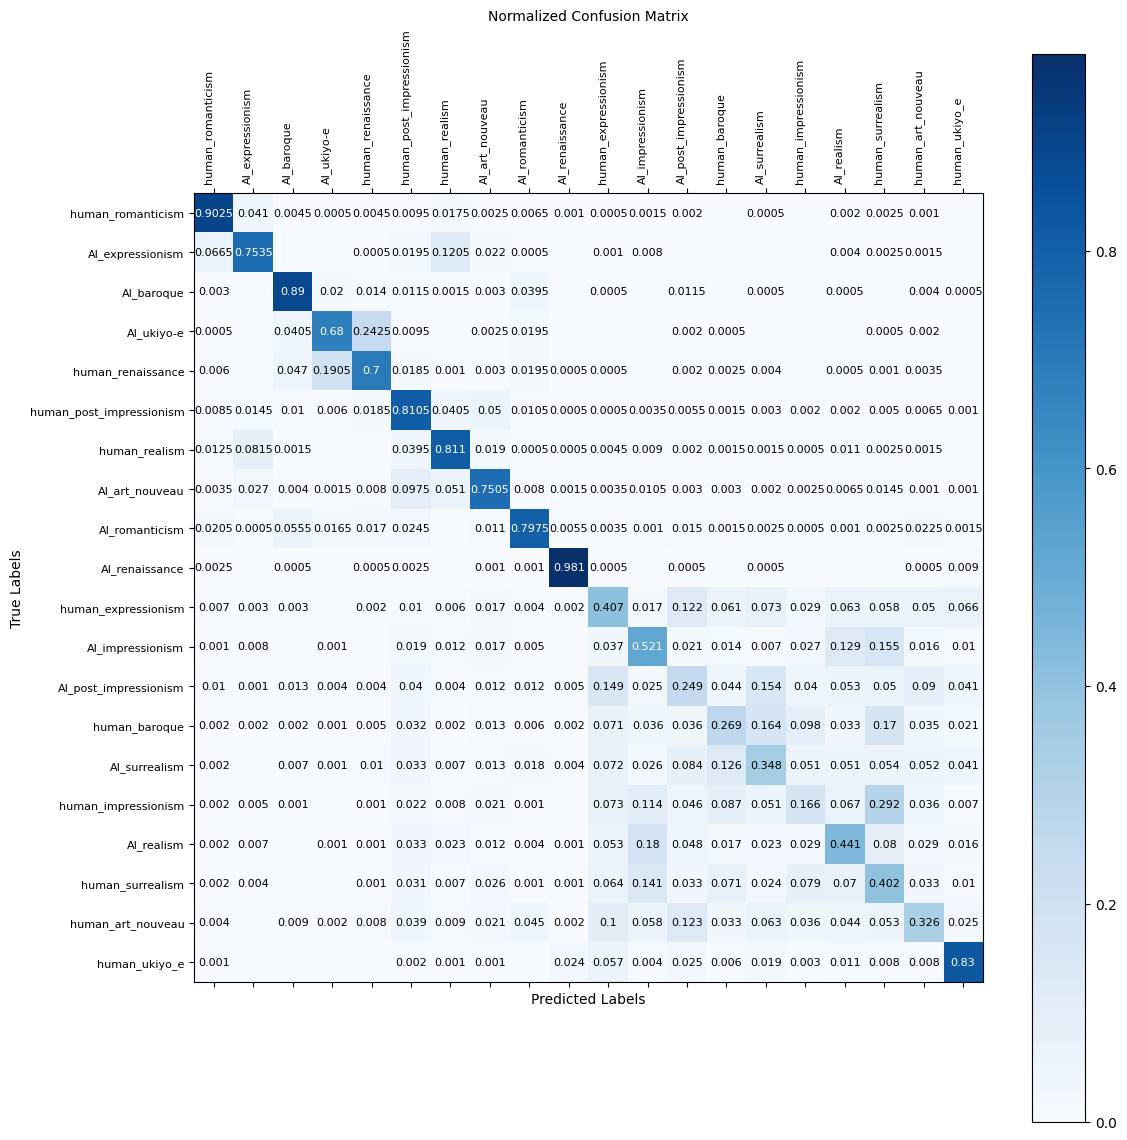


Classification Report:
                          precision    recall  f1-score   support

       human_romanticism       0.87      0.90      0.88      2000
        AI_expressionism       0.81      0.75      0.78      2000
              AI_baroque       0.83      0.89      0.86      2000
              AI_ukiyo-e       0.74      0.68      0.71      2000
       human_renaissance       0.69      0.70      0.69      2000
human_post_impressionism       0.69      0.81      0.75      2000
           human_realism       0.75      0.81      0.78      2000
          AI_art_nouveau       0.80      0.75      0.77      2000
          AI_romanticism       0.84      0.80      0.82      2000
          AI_renaissance       0.97      0.98      0.98      2000
     human_expressionism       0.37      0.41      0.39      1000
        AI_impressionism       0.44      0.52      0.48      1000
   AI_post_impressionism       0.28      0.25      0.27      1000
           human_baroque       0.36      0.27      

In [17]:
# Analyze test results
metrics = analyze_test_results(
    test_loss=test_loss,
    test_accuracy=test_accuracy,
    test_per_class_accuracy=test_per_class_accuracy,
    all_labels=all_labels,
    all_predictions=all_predictions,
    classes=test_classes
)